##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [5]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2,  el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [7]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1, k2 = -0.17, -0.17;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.5, -0.5, -0.5, -0.5, 0-0.5, -0.5]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2,  el_link]


p = [a, b, c, d, s, xr, r, I, xv, k, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );

LoadError: BoundsError: attempt to access 11-element Vector{Float64} at index [12]

In [ ]:
ds_HR1

In [159]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054, 0.0]

In [160]:
tr = trajectory(ds_HR1, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum = tr[:, 1] + tr[:, 4]
xsum = xsum[floor(Int, length(xsum) / 2):end ];
x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

In [161]:
tr1 = trajectory(ds_HR2, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum1 = tr1[:, 1] + tr1[:, 4]
xsum1 = xsum1[floor(Int, length(xsum1) / 2):end ];
x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11 = z11[floor(Int, length(z11) / 2):end ];

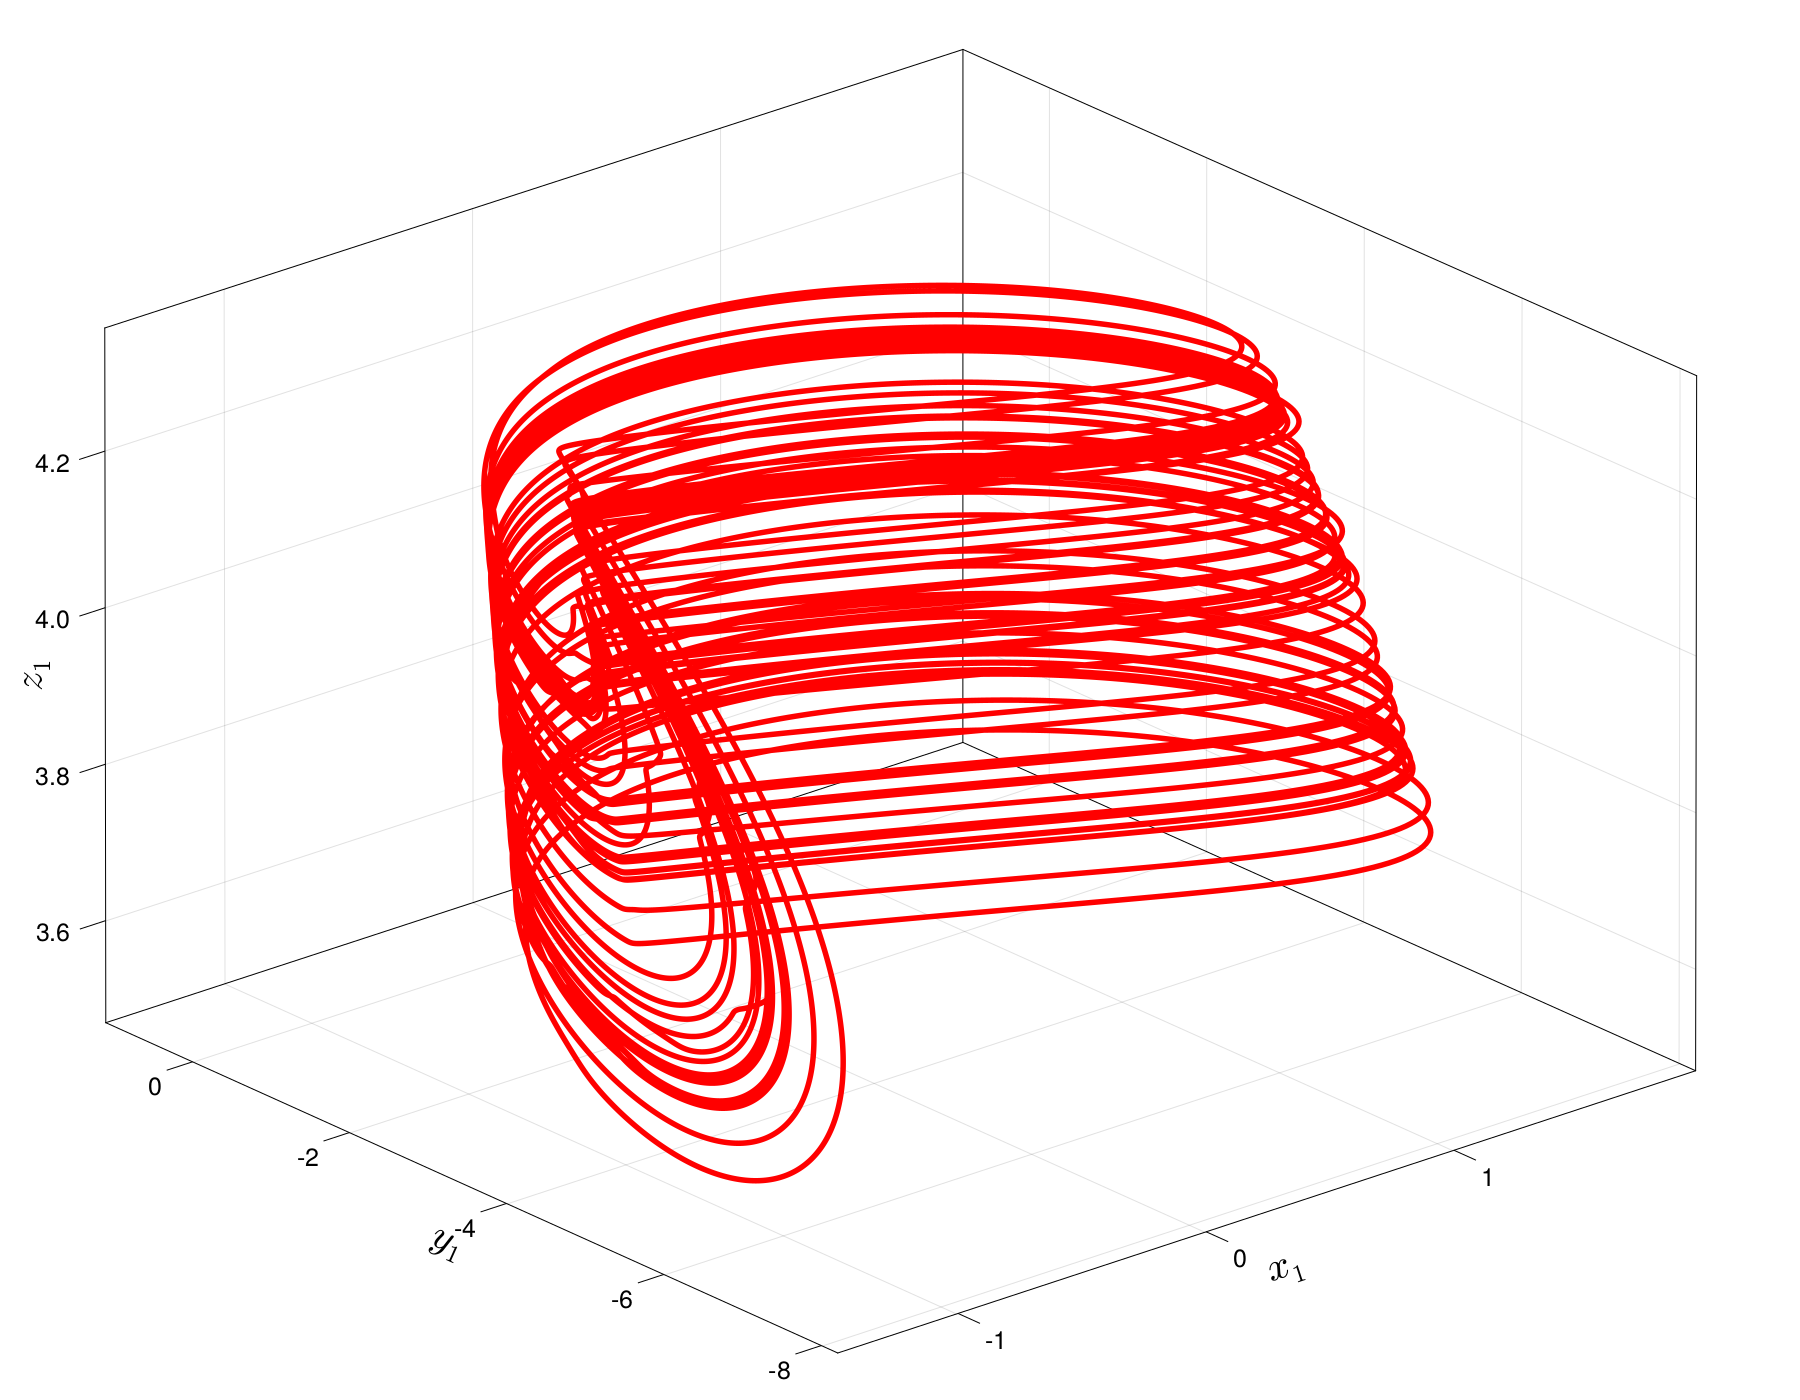

In [162]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x1[ts:tf], y1[ts:tf], z1[ts:tf], linewidth = 5.5, color = "red" )


f

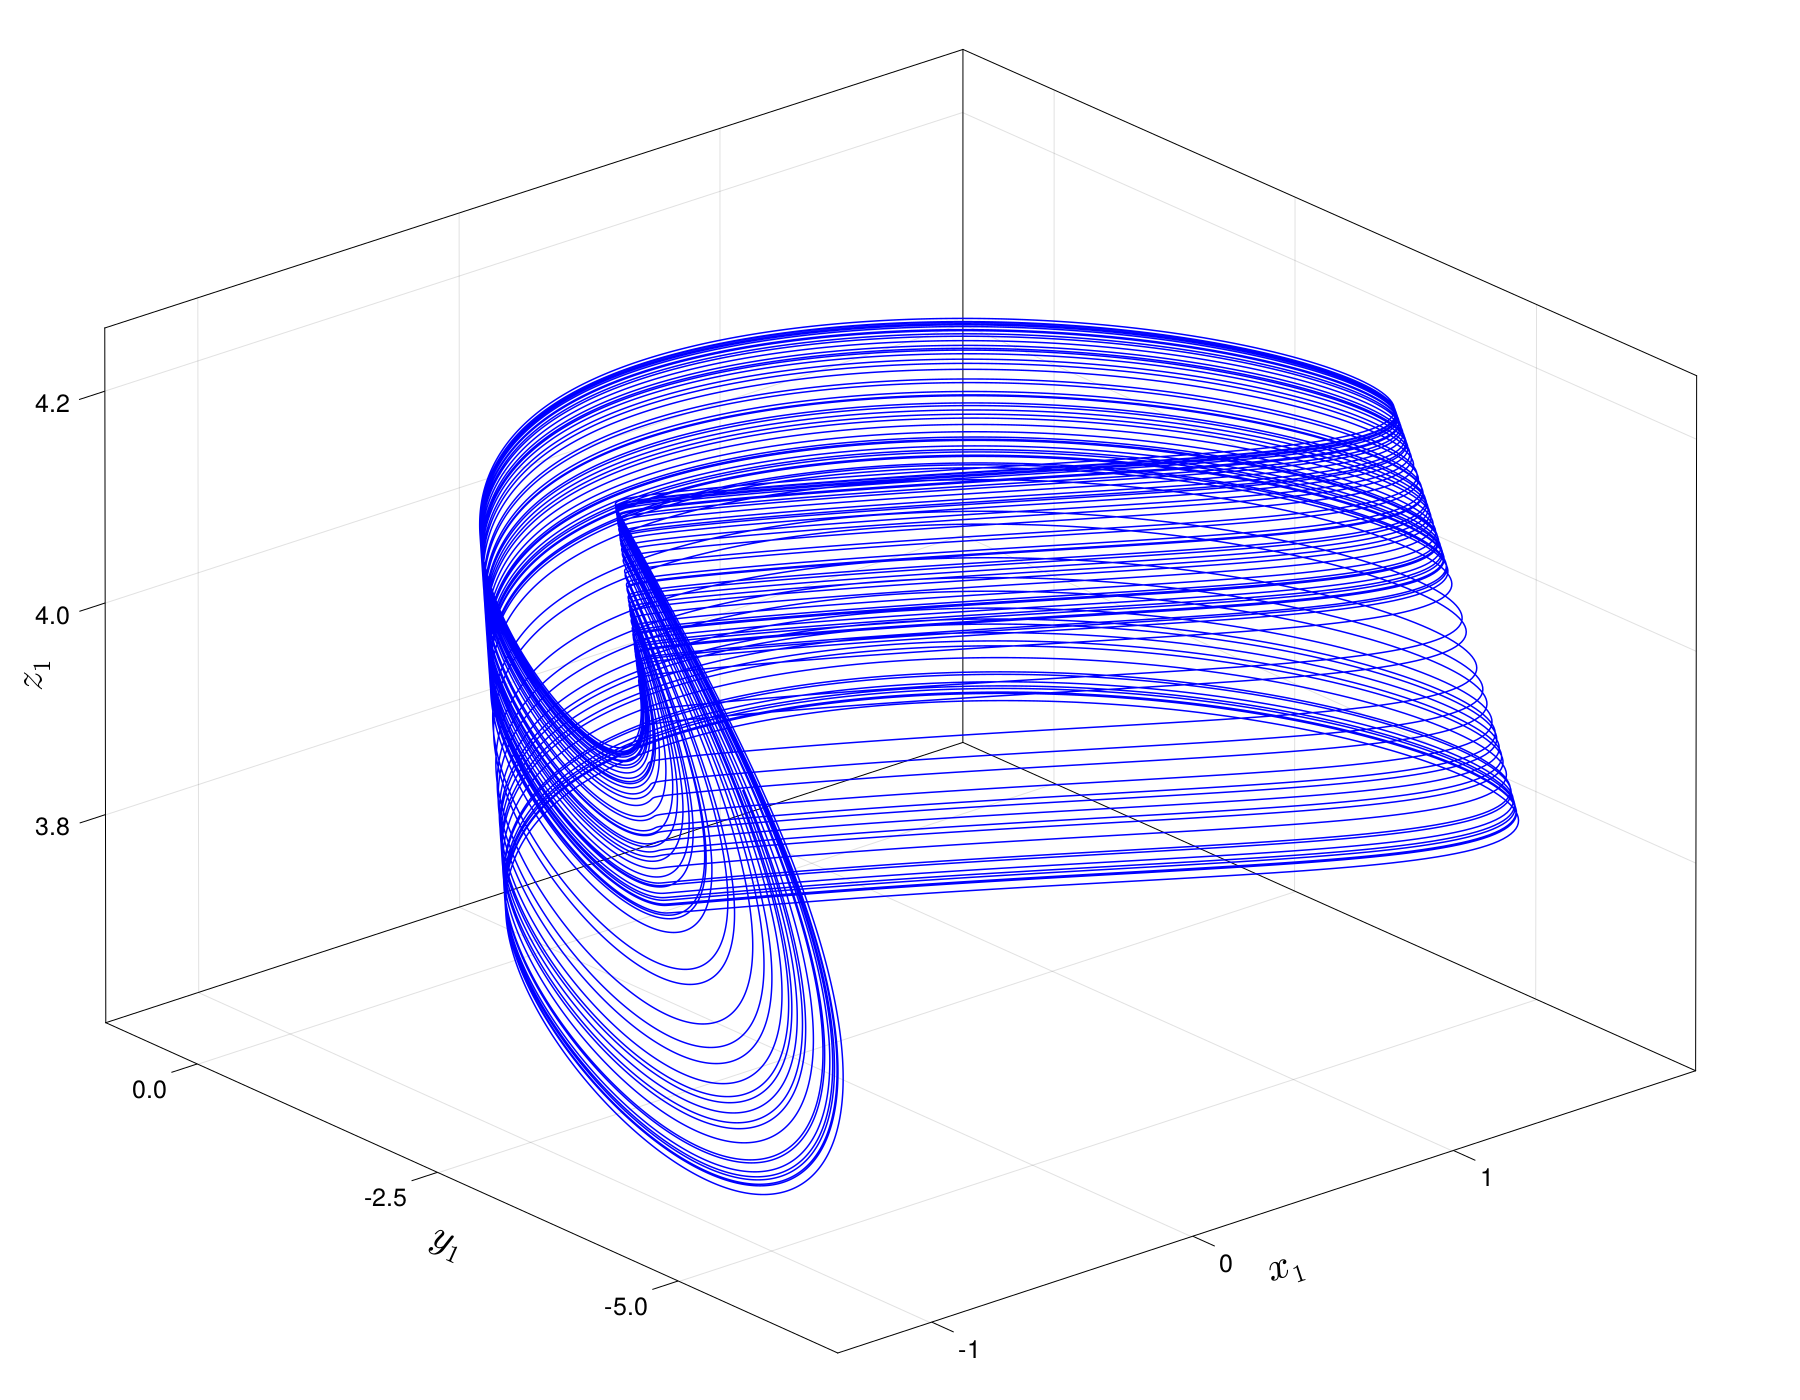

In [163]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x11[ts:tf], y11[ts:tf], z11[ts:tf], linewidth = 1.5, color = "blue" )


f

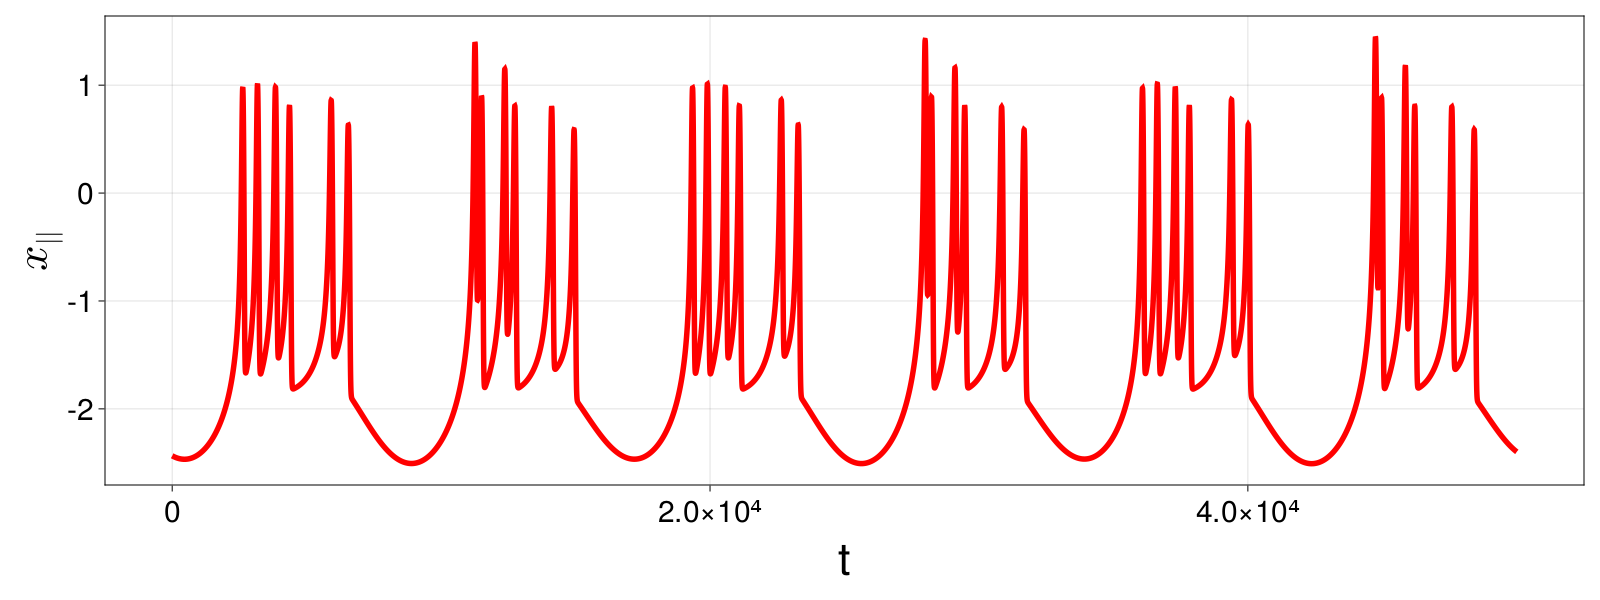

In [164]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum[1:50000], linewidth = 5.5, color = "red" )
f

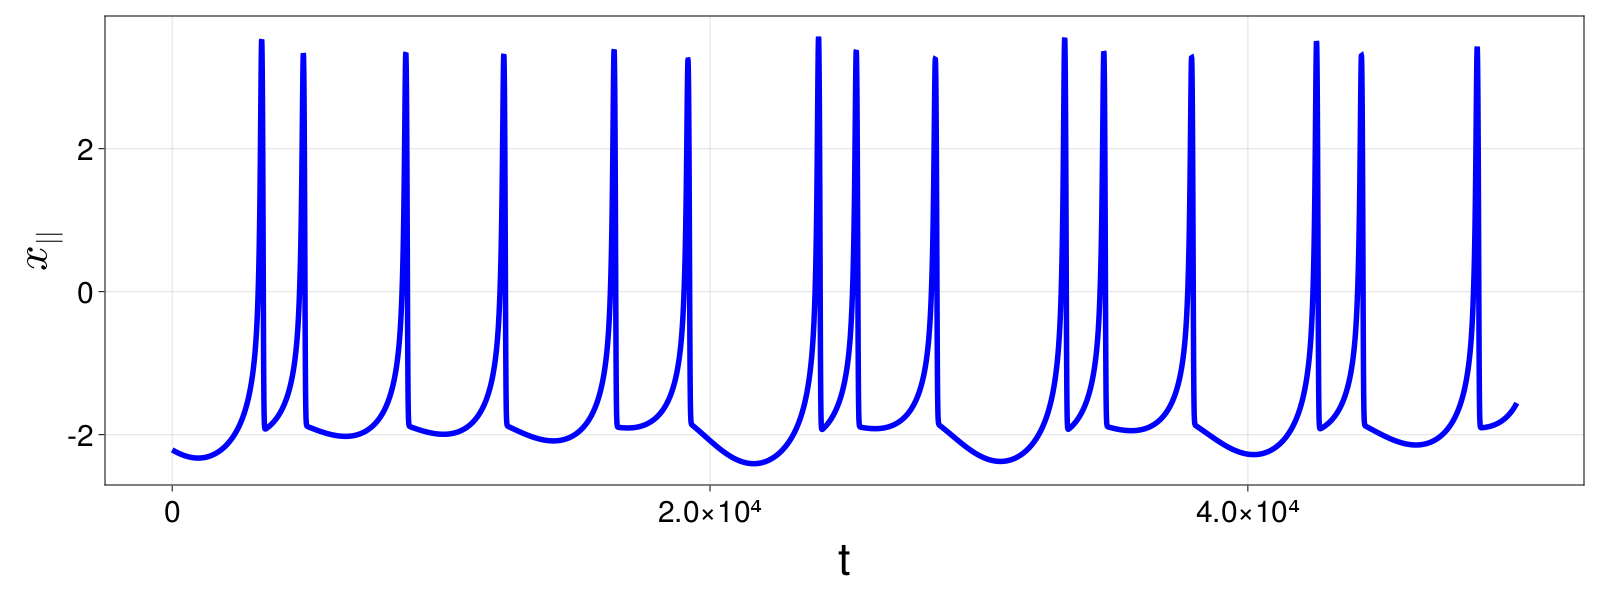

In [165]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum1[1:50000], linewidth = 5.5, color = "blue" )
f

## x1 = 0, plot k in x2 

In [178]:
ds = ds_HR1

pvalues = range(-0.5, stop = 0.5, length = 5000)
i = 1
plane = (2, 0.0)
tf = 1000.0
tr = 5000.0
p_index = 10

10

In [179]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.4997999599919984
parameter = -0.4995999199839968
parameter = -0.4993998799759952
parameter = -0.4991998399679936
parameter = -0.498999799959992
parameter = -0.4987997599519904
parameter = -0.4985997199439888
parameter = -0.4983996799359872
parameter = -0.4981996399279856
parameter = -0.497999599919984
parameter = -0.4977995599119824
parameter = -0.49759951990398077
parameter = -0.4973994798959792
parameter = -0.4971994398879776
parameter = -0.496999399879976
parameter = -0.4967993598719744
parameter = -0.4965993198639728
parameter = -0.4963992798559712
parameter = -0.4961992398479696
parameter = -0.495999199839968
parameter = -0.4957991598319664
parameter = -0.4955991198239648
parameter = -0.4953990798159632
parameter = -0.4951990398079616
parameter = -0.49499899979996
parameter = -0.49479895979195837
parameter = -0.4945989197839568
parameter = -0.4943988797759552
parameter = -0.4941988397679536
parameter = -0.493998799759952
parameter = -0.4937987597519

parameter = -0.4365873174634927
parameter = -0.4363872774554911
parameter = -0.4361872374474895
parameter = -0.4359871974394879
parameter = -0.43578715743148627
parameter = -0.4355871174234847
parameter = -0.4353870774154831
parameter = -0.4351870374074815
parameter = -0.4349869973994799
parameter = -0.43478695739147827
parameter = -0.4345869173834767
parameter = -0.4343868773754751
parameter = -0.4341868373674735
parameter = -0.4339867973594719
parameter = -0.4337867573514703
parameter = -0.4335867173434687
parameter = -0.4333866773354671
parameter = -0.4331866373274655
parameter = -0.4329865973194639
parameter = -0.4327865573114623
parameter = -0.4325865173034607
parameter = -0.4323864772954591
parameter = -0.4321864372874575
parameter = -0.43198639727945587
parameter = -0.4317863572714543
parameter = -0.4315863172634527
parameter = -0.4313862772554511
parameter = -0.4311862372474495
parameter = -0.43098619723944787
parameter = -0.4307861572314463
parameter = -0.4305861172234447
para

parameter = -0.3731746349269854
parameter = -0.37297459491898377
parameter = -0.3727745549109822
parameter = -0.3725745149029806
parameter = -0.372374474894979
parameter = -0.3721744348869774
parameter = -0.3719743948789758
parameter = -0.3717743548709742
parameter = -0.3715743148629726
parameter = -0.371374274854971
parameter = -0.3711742348469694
parameter = -0.3709741948389678
parameter = -0.3707741548309662
parameter = -0.3705741148229646
parameter = -0.370374074814963
parameter = -0.37017403480696137
parameter = -0.3699739947989598
parameter = -0.3697739547909582
parameter = -0.3695739147829566
parameter = -0.369373874774955
parameter = -0.36917383476695337
parameter = -0.3689737947589518
parameter = -0.3687737547509502
parameter = -0.3685737147429486
parameter = -0.368373674734947
parameter = -0.36817363472694536
parameter = -0.3679735947189438
parameter = -0.3677735547109422
parameter = -0.3675735147029406
parameter = -0.367373474694939
parameter = -0.36717343468693736
parameter

parameter = -0.3097619523904781
parameter = -0.3095619123824765
parameter = -0.3093618723744749
parameter = -0.3091618323664733
parameter = -0.3089617923584717
parameter = -0.3087617523504701
parameter = -0.3085617123424685
parameter = -0.3083616723344669
parameter = -0.3081616323264653
parameter = -0.3079615923184637
parameter = -0.3077615523104621
parameter = -0.3075615123024605
parameter = -0.30736147229445887
parameter = -0.3071614322864573
parameter = -0.3069613922784557
parameter = -0.3067613522704541
parameter = -0.3065613122624525
parameter = -0.30636127225445087
parameter = -0.3061612322464493
parameter = -0.3059611922384477
parameter = -0.3057611522304461
parameter = -0.3055611122224445
parameter = -0.30536107221444286
parameter = -0.3051610322064413
parameter = -0.3049609921984397
parameter = -0.3047609521904381
parameter = -0.30456091218243647
parameter = -0.30436087217443486
parameter = -0.3041608321664333
parameter = -0.3039607921584317
parameter = -0.3037607521504301
par

parameter = -0.2463492698539708
parameter = -0.24614922984596918
parameter = -0.2459491898379676
parameter = -0.24574914982996598
parameter = -0.2455491098219644
parameter = -0.2453490698139628
parameter = -0.2451490298059612
parameter = -0.2449489897979596
parameter = -0.24474894978995798
parameter = -0.2445489097819564
parameter = -0.24434886977395479
parameter = -0.2441488297659532
parameter = -0.2439487897579516
parameter = -0.24374874974994998
parameter = -0.2435487097419484
parameter = -0.24334866973394678
parameter = -0.2431486297259452
parameter = -0.24294858971794359
parameter = -0.242748549709942
parameter = -0.2425485097019404
parameter = -0.24234846969393878
parameter = -0.2421484296859372
parameter = -0.24194838967793558
parameter = -0.241748349669934
parameter = -0.2415483096619324
parameter = -0.24134826965393077
parameter = -0.2411482296459292
parameter = -0.24094818963792758
parameter = -0.240748149629926
parameter = -0.24054810962192438
parameter = -0.2403480696139227

parameter = -0.1837367473494699
parameter = -0.1835367073414683
parameter = -0.18333666733346668
parameter = -0.1831366273254651
parameter = -0.18293658731746348
parameter = -0.1827365473094619
parameter = -0.1825365073014603
parameter = -0.1823364672934587
parameter = -0.1821364272854571
parameter = -0.18193638727745548
parameter = -0.1817363472694539
parameter = -0.18153630726145228
parameter = -0.1813362672534507
parameter = -0.1811362272454491
parameter = -0.18093618723744748
parameter = -0.1807361472294459
parameter = -0.18053610722144428
parameter = -0.1803360672134427
parameter = -0.18013602720544108
parameter = -0.1799359871974395
parameter = -0.1797359471894379
parameter = -0.17953590718143628
parameter = -0.1793358671734347
parameter = -0.17913582716543308
parameter = -0.1789357871574315
parameter = -0.17873574714942989
parameter = -0.17853570714142827
parameter = -0.1783356671334267
parameter = -0.17813562712542508
parameter = -0.1779355871174235
parameter = -0.1777355471094

parameter = -0.12072414482896579
parameter = -0.12052410482096419
parameter = -0.1203240648129626
parameter = -0.120124024804961
parameter = -0.1199239847969594
parameter = -0.11972394478895779
parameter = -0.11952390478095619
parameter = -0.11932386477295459
parameter = -0.11912382476495299
parameter = -0.1189237847569514
parameter = -0.11872374474894978
parameter = -0.11852370474094819
parameter = -0.11832366473294659
parameter = -0.11812362472494499
parameter = -0.11792358471694339
parameter = -0.1177235447089418
parameter = -0.11752350470094018
parameter = -0.11732346469293858
parameter = -0.11712342468493699
parameter = -0.11692338467693539
parameter = -0.11672334466893379
parameter = -0.11652330466093219
parameter = -0.11632326465293058
parameter = -0.11612322464492898
parameter = -0.11592318463692738
parameter = -0.11572314462892579
parameter = -0.11552310462092419
parameter = -0.11532306461292259
parameter = -0.11512302460492098
parameter = -0.11492298459691938
parameter = -0.1

parameter = -0.05831166233246649
parameter = -0.058111622324464894
parameter = -0.05791158231646329
parameter = -0.05771154230846169
parameter = -0.05751150230046009
parameter = -0.05731146229245849
parameter = -0.05711142228445689
parameter = -0.05691138227645529
parameter = -0.05671134226845369
parameter = -0.05651130226045209
parameter = -0.05631126225245049
parameter = -0.05611122224444889
parameter = -0.05591118223644729
parameter = -0.05571114222844569
parameter = -0.055511102220444086
parameter = -0.05531106221244249
parameter = -0.05511102220444089
parameter = -0.054910982196439286
parameter = -0.05471094218843769
parameter = -0.05451090218043609
parameter = -0.054310862172434485
parameter = -0.05411082216443289
parameter = -0.05391078215643129
parameter = -0.053710742148429684
parameter = -0.053510702140428086
parameter = -0.05331066213242649
parameter = -0.05311062212442488
parameter = -0.052910582116423285
parameter = -0.05271054210842169
parameter = -0.05251050210042008
par

parameter = 0.0027005401080216042
parameter = 0.0029005801160232048
parameter = 0.003100620124024805
parameter = 0.0033006601320264054
parameter = 0.0035007001400280055
parameter = 0.003700740148029606
parameter = 0.003900780156031206
parameter = 0.004100820164032806
parameter = 0.004300860172034407
parameter = 0.004500900180036007
parameter = 0.004700940188037608
parameter = 0.0049009801960392075
parameter = 0.005101020204040808
parameter = 0.005301060212042409
parameter = 0.005501100220044009
parameter = 0.005701140228045609
parameter = 0.005901180236047209
parameter = 0.00610122024404881
parameter = 0.00630126025205041
parameter = 0.00650130026005201
parameter = 0.006701340268053611
parameter = 0.006901380276055211
parameter = 0.007101420284056812
parameter = 0.007301460292058411
parameter = 0.007501500300060012
parameter = 0.0077015403080616125
parameter = 0.007901580316063212
parameter = 0.008101620324064814
parameter = 0.008301660332066413
parameter = 0.008501700340068013
paramet

parameter = 0.0659131826365273
parameter = 0.0661132226445289
parameter = 0.0663132626525305
parameter = 0.06651330266053211
parameter = 0.06671334266853371
parameter = 0.06691338267653531
parameter = 0.0671134226845369
parameter = 0.0673134626925385
parameter = 0.0675135027005401
parameter = 0.06771354270854171
parameter = 0.06791358271654331
parameter = 0.06811362272454491
parameter = 0.0683136627325465
parameter = 0.0685137027405481
parameter = 0.06871374274854972
parameter = 0.06891378275655131
parameter = 0.06911382276455291
parameter = 0.06931386277255451
parameter = 0.06951390278055611
parameter = 0.0697139427885577
parameter = 0.06991398279655932
parameter = 0.07011402280456092
parameter = 0.07031406281256251
parameter = 0.07051410282056411
parameter = 0.07071414282856571
parameter = 0.07091418283656731
parameter = 0.07111422284456892
parameter = 0.07131426285257052
parameter = 0.07151430286057212
parameter = 0.07171434286857371
parameter = 0.07191438287657531
parameter = 0.072

parameter = 0.1303260652130426
parameter = 0.13052610522104421
parameter = 0.1307261452290458
parameter = 0.1309261852370474
parameter = 0.13112622524504902
parameter = 0.1313262652530506
parameter = 0.13152630526105222
parameter = 0.1317263452690538
parameter = 0.1319263852770554
parameter = 0.132126425285057
parameter = 0.1323264652930586
parameter = 0.13252650530106022
parameter = 0.1327265453090618
parameter = 0.13292658531706342
parameter = 0.133126625325065
parameter = 0.1333266653330666
parameter = 0.13352670534106822
parameter = 0.1337267453490698
parameter = 0.13392678535707142
parameter = 0.134126825365073
parameter = 0.13432686537307462
parameter = 0.13452690538107623
parameter = 0.1347269453890778
parameter = 0.13492698539707942
parameter = 0.135127025405081
parameter = 0.13532706541308262
parameter = 0.1355271054210842
parameter = 0.13572714542908582
parameter = 0.13592718543708743
parameter = 0.136127225445089
parameter = 0.13632726545309062
parameter = 0.1365273054610922

parameter = 0.1951390278055611
parameter = 0.19533906781356272
parameter = 0.1955391078215643
parameter = 0.19573914782956592
parameter = 0.1959391878375675
parameter = 0.19613922784556911
parameter = 0.19633926785357073
parameter = 0.1965393078615723
parameter = 0.19673934786957392
parameter = 0.1969393878775755
parameter = 0.19713942788557712
parameter = 0.19733946789357873
parameter = 0.1975395079015803
parameter = 0.19773954790958193
parameter = 0.1979395879175835
parameter = 0.19813962792558512
parameter = 0.1983396679335867
parameter = 0.19853970794158832
parameter = 0.19873974794958993
parameter = 0.1989397879575915
parameter = 0.19913982796559312
parameter = 0.1993398679735947
parameter = 0.19953990798159632
parameter = 0.19973994798959793
parameter = 0.19993998799759952
parameter = 0.20014002800560113
parameter = 0.2003400680136027
parameter = 0.20054010802160432
parameter = 0.2007401480296059
parameter = 0.20094018803760752
parameter = 0.20114022804560913
parameter = 0.201340

parameter = 0.2599519903980796
parameter = 0.2601520304060812
parameter = 0.2603520704140828
parameter = 0.2605521104220844
parameter = 0.26075215043008604
parameter = 0.2609521904380876
parameter = 0.2611522304460892
parameter = 0.2613522704540908
parameter = 0.26155231046209243
parameter = 0.26175235047009404
parameter = 0.2619523904780956
parameter = 0.2621524304860972
parameter = 0.2623524704940988
parameter = 0.26255251050210043
parameter = 0.26275255051010205
parameter = 0.2629525905181036
parameter = 0.2631526305261052
parameter = 0.2633526705341068
parameter = 0.26355271054210844
parameter = 0.26375275055011005
parameter = 0.2639527905581116
parameter = 0.2641528305661132
parameter = 0.26435287057411483
parameter = 0.26455291058211644
parameter = 0.264752950590118
parameter = 0.2649529905981196
parameter = 0.2651530306061212
parameter = 0.26535307061412283
parameter = 0.26555311062212444
parameter = 0.265753150630126
parameter = 0.2659531906381276
parameter = 0.2661532306461292

parameter = 0.3251650330066013
parameter = 0.32536507301460293
parameter = 0.32556511302260455
parameter = 0.3257651530306061
parameter = 0.3259651930386077
parameter = 0.3261652330466093
parameter = 0.32636527305461094
parameter = 0.32656531306261255
parameter = 0.3267653530706141
parameter = 0.3269653930786157
parameter = 0.32716543308661733
parameter = 0.32736547309461894
parameter = 0.3275655131026205
parameter = 0.3277655531106221
parameter = 0.3279655931186237
parameter = 0.32816563312662533
parameter = 0.32836567313462695
parameter = 0.3285657131426285
parameter = 0.3287657531506301
parameter = 0.3289657931586317
parameter = 0.32916583316663334
parameter = 0.32936587317463495
parameter = 0.3295659131826365
parameter = 0.3297659531906381
parameter = 0.32996599319863973
parameter = 0.33016603320664134
parameter = 0.33036607321464295
parameter = 0.3305661132226445
parameter = 0.3307661532306461
parameter = 0.33096619323864773
parameter = 0.33116623324664934
parameter = 0.3313662732

parameter = 0.3905781156231246
parameter = 0.3907781556311262
parameter = 0.39097819563912783
parameter = 0.39117823564712945
parameter = 0.391378275655131
parameter = 0.3915783156631326
parameter = 0.3917783556711342
parameter = 0.39197839567913584
parameter = 0.39217843568713745
parameter = 0.392378475695139
parameter = 0.3925785157031406
parameter = 0.39277855571114223
parameter = 0.39297859571914384
parameter = 0.39317863572714545
parameter = 0.393378675735147
parameter = 0.3935787157431486
parameter = 0.39377875575115023
parameter = 0.39397879575915185
parameter = 0.39417883576715346
parameter = 0.394378875775155
parameter = 0.3945789157831566
parameter = 0.39477895579115824
parameter = 0.39497899579915985
parameter = 0.3951790358071614
parameter = 0.395379075815163
parameter = 0.39557911582316463
parameter = 0.39577915583116624
parameter = 0.39597919583916785
parameter = 0.3961792358471694
parameter = 0.396379275855171
parameter = 0.39657931586317263
parameter = 0.396779355871174

parameter = 0.45559111822364473
parameter = 0.45579115823164634
parameter = 0.45599119823964795
parameter = 0.4561912382476495
parameter = 0.4563912782556511
parameter = 0.45659131826365273
parameter = 0.45679135827165435
parameter = 0.45699139827965596
parameter = 0.4571914382876575
parameter = 0.4573914782956591
parameter = 0.45759151830366074
parameter = 0.45779155831166235
parameter = 0.4579915983196639
parameter = 0.4581916383276655
parameter = 0.45839167833566713
parameter = 0.45859171834366874
parameter = 0.45879175835167035
parameter = 0.4589917983596719
parameter = 0.4591918383676735
parameter = 0.45939187837567513
parameter = 0.45959191838367675
parameter = 0.45979195839167836
parameter = 0.4599919983996799
parameter = 0.4601920384076815
parameter = 0.46039207841568314
parameter = 0.46059211842368475
parameter = 0.46079215843168636
parameter = 0.4609921984396879
parameter = 0.46119223844768953
parameter = 0.46139227845569114
parameter = 0.46159231846369275
parameter = 0.46179

In [180]:
ds = ds_HR1

pvalues = range(-0.5, stop = 0.5, length = 5000)
i = 4
plane = (2, 0.0)
tf = 1000.0
tr = 5000.0
p_index = 10

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.4997999599919984
parameter = -0.4995999199839968
parameter = -0.4993998799759952
parameter = -0.4991998399679936
parameter = -0.498999799959992
parameter = -0.4987997599519904
parameter = -0.4985997199439888
parameter = -0.4983996799359872
parameter = -0.4981996399279856
parameter = -0.497999599919984
parameter = -0.4977995599119824
parameter = -0.49759951990398077
parameter = -0.4973994798959792
parameter = -0.4971994398879776
parameter = -0.496999399879976
parameter = -0.4967993598719744
parameter = -0.4965993198639728
parameter = -0.4963992798559712
parameter = -0.4961992398479696
parameter = -0.495999199839968
parameter = -0.4957991598319664
parameter = -0.4955991198239648
parameter = -0.4953990798159632
parameter = -0.4951990398079616
parameter = -0.49499899979996
parameter = -0.49479895979195837
parameter = -0.4945989197839568
parameter = -0.4943988797759552
parameter = -0.4941988397679536
parameter = -0.493998799759952
parameter = -0.4937987597519

parameter = -0.4365873174634927
parameter = -0.4363872774554911
parameter = -0.4361872374474895
parameter = -0.4359871974394879
parameter = -0.43578715743148627
parameter = -0.4355871174234847
parameter = -0.4353870774154831
parameter = -0.4351870374074815
parameter = -0.4349869973994799
parameter = -0.43478695739147827
parameter = -0.4345869173834767
parameter = -0.4343868773754751
parameter = -0.4341868373674735
parameter = -0.4339867973594719
parameter = -0.4337867573514703
parameter = -0.4335867173434687
parameter = -0.4333866773354671
parameter = -0.4331866373274655
parameter = -0.4329865973194639
parameter = -0.4327865573114623
parameter = -0.4325865173034607
parameter = -0.4323864772954591
parameter = -0.4321864372874575
parameter = -0.43198639727945587
parameter = -0.4317863572714543
parameter = -0.4315863172634527
parameter = -0.4313862772554511
parameter = -0.4311862372474495
parameter = -0.43098619723944787
parameter = -0.4307861572314463
parameter = -0.4305861172234447
para

parameter = -0.373374674934987
parameter = -0.3731746349269854
parameter = -0.37297459491898377
parameter = -0.3727745549109822
parameter = -0.3725745149029806
parameter = -0.372374474894979
parameter = -0.3721744348869774
parameter = -0.3719743948789758
parameter = -0.3717743548709742
parameter = -0.3715743148629726
parameter = -0.371374274854971
parameter = -0.3711742348469694
parameter = -0.3709741948389678
parameter = -0.3707741548309662
parameter = -0.3705741148229646
parameter = -0.370374074814963
parameter = -0.37017403480696137
parameter = -0.3699739947989598
parameter = -0.3697739547909582
parameter = -0.3695739147829566
parameter = -0.369373874774955
parameter = -0.36917383476695337
parameter = -0.3689737947589518
parameter = -0.3687737547509502
parameter = -0.3685737147429486
parameter = -0.368373674734947
parameter = -0.36817363472694536
parameter = -0.3679735947189438
parameter = -0.3677735547109422
parameter = -0.3675735147029406
parameter = -0.367373474694939
parameter =

parameter = -0.3099619923984797
parameter = -0.3097619523904781
parameter = -0.3095619123824765
parameter = -0.3093618723744749
parameter = -0.3091618323664733
parameter = -0.3089617923584717
parameter = -0.3087617523504701
parameter = -0.3085617123424685
parameter = -0.3083616723344669
parameter = -0.3081616323264653
parameter = -0.3079615923184637
parameter = -0.3077615523104621
parameter = -0.3075615123024605
parameter = -0.30736147229445887
parameter = -0.3071614322864573
parameter = -0.3069613922784557
parameter = -0.3067613522704541
parameter = -0.3065613122624525
parameter = -0.30636127225445087
parameter = -0.3061612322464493
parameter = -0.3059611922384477
parameter = -0.3057611522304461
parameter = -0.3055611122224445
parameter = -0.30536107221444286
parameter = -0.3051610322064413
parameter = -0.3049609921984397
parameter = -0.3047609521904381
parameter = -0.30456091218243647
parameter = -0.30436087217443486
parameter = -0.3041608321664333
parameter = -0.3039607921584317
par

parameter = -0.2465493098619724
parameter = -0.2463492698539708
parameter = -0.24614922984596918
parameter = -0.2459491898379676
parameter = -0.24574914982996598
parameter = -0.2455491098219644
parameter = -0.2453490698139628
parameter = -0.2451490298059612
parameter = -0.2449489897979596
parameter = -0.24474894978995798
parameter = -0.2445489097819564
parameter = -0.24434886977395479
parameter = -0.2441488297659532
parameter = -0.2439487897579516
parameter = -0.24374874974994998
parameter = -0.2435487097419484
parameter = -0.24334866973394678
parameter = -0.2431486297259452
parameter = -0.24294858971794359
parameter = -0.242748549709942
parameter = -0.2425485097019404
parameter = -0.24234846969393878
parameter = -0.2421484296859372
parameter = -0.24194838967793558
parameter = -0.241748349669934
parameter = -0.2415483096619324
parameter = -0.24134826965393077
parameter = -0.2411482296459292
parameter = -0.24094818963792758
parameter = -0.240748149629926
parameter = -0.24054810962192438

parameter = -0.1835367073414683
parameter = -0.18333666733346668
parameter = -0.1831366273254651
parameter = -0.18293658731746348
parameter = -0.1827365473094619
parameter = -0.1825365073014603
parameter = -0.1823364672934587
parameter = -0.1821364272854571
parameter = -0.18193638727745548
parameter = -0.1817363472694539
parameter = -0.18153630726145228
parameter = -0.1813362672534507
parameter = -0.1811362272454491
parameter = -0.18093618723744748
parameter = -0.1807361472294459
parameter = -0.18053610722144428
parameter = -0.1803360672134427
parameter = -0.18013602720544108
parameter = -0.1799359871974395
parameter = -0.1797359471894379
parameter = -0.17953590718143628
parameter = -0.1793358671734347
parameter = -0.17913582716543308
parameter = -0.1789357871574315
parameter = -0.17873574714942989
parameter = -0.17853570714142827
parameter = -0.1783356671334267
parameter = -0.17813562712542508
parameter = -0.1779355871174235
parameter = -0.17773554710942188
parameter = -0.177535507101

parameter = -0.12092418483696739
parameter = -0.12072414482896579
parameter = -0.12052410482096419
parameter = -0.1203240648129626
parameter = -0.120124024804961
parameter = -0.1199239847969594
parameter = -0.11972394478895779
parameter = -0.11952390478095619
parameter = -0.11932386477295459
parameter = -0.11912382476495299
parameter = -0.1189237847569514
parameter = -0.11872374474894978
parameter = -0.11852370474094819
parameter = -0.11832366473294659
parameter = -0.11812362472494499
parameter = -0.11792358471694339
parameter = -0.1177235447089418
parameter = -0.11752350470094018
parameter = -0.11732346469293858
parameter = -0.11712342468493699
parameter = -0.11692338467693539
parameter = -0.11672334466893379
parameter = -0.11652330466093219
parameter = -0.11632326465293058
parameter = -0.11612322464492898
parameter = -0.11592318463692738
parameter = -0.11572314462892579
parameter = -0.11552310462092419
parameter = -0.11532306461292259
parameter = -0.11512302460492098
parameter = -0.1

parameter = -0.05831166233246649
parameter = -0.058111622324464894
parameter = -0.05791158231646329
parameter = -0.05771154230846169
parameter = -0.05751150230046009
parameter = -0.05731146229245849
parameter = -0.05711142228445689
parameter = -0.05691138227645529
parameter = -0.05671134226845369
parameter = -0.05651130226045209
parameter = -0.05631126225245049
parameter = -0.05611122224444889
parameter = -0.05591118223644729
parameter = -0.05571114222844569
parameter = -0.055511102220444086
parameter = -0.05531106221244249
parameter = -0.05511102220444089
parameter = -0.054910982196439286
parameter = -0.05471094218843769
parameter = -0.05451090218043609
parameter = -0.054310862172434485
parameter = -0.05411082216443289
parameter = -0.05391078215643129
parameter = -0.053710742148429684
parameter = -0.053510702140428086
parameter = -0.05331066213242649
parameter = -0.05311062212442488
parameter = -0.052910582116423285
parameter = -0.05271054210842169
parameter = -0.05251050210042008
par

parameter = 0.002500500100020004
parameter = 0.0027005401080216042
parameter = 0.0029005801160232048
parameter = 0.003100620124024805
parameter = 0.0033006601320264054
parameter = 0.0035007001400280055
parameter = 0.003700740148029606
parameter = 0.003900780156031206
parameter = 0.004100820164032806
parameter = 0.004300860172034407
parameter = 0.004500900180036007
parameter = 0.004700940188037608
parameter = 0.0049009801960392075
parameter = 0.005101020204040808
parameter = 0.005301060212042409
parameter = 0.005501100220044009
parameter = 0.005701140228045609
parameter = 0.005901180236047209
parameter = 0.00610122024404881
parameter = 0.00630126025205041
parameter = 0.00650130026005201
parameter = 0.006701340268053611
parameter = 0.006901380276055211
parameter = 0.007101420284056812
parameter = 0.007301460292058411
parameter = 0.007501500300060012
parameter = 0.0077015403080616125
parameter = 0.007901580316063212
parameter = 0.008101620324064814
parameter = 0.008301660332066413
paramet

parameter = 0.0659131826365273
parameter = 0.0661132226445289
parameter = 0.0663132626525305
parameter = 0.06651330266053211
parameter = 0.06671334266853371
parameter = 0.06691338267653531
parameter = 0.0671134226845369
parameter = 0.0673134626925385
parameter = 0.0675135027005401
parameter = 0.06771354270854171
parameter = 0.06791358271654331
parameter = 0.06811362272454491
parameter = 0.0683136627325465
parameter = 0.0685137027405481
parameter = 0.06871374274854972
parameter = 0.06891378275655131
parameter = 0.06911382276455291
parameter = 0.06931386277255451
parameter = 0.06951390278055611
parameter = 0.0697139427885577
parameter = 0.06991398279655932
parameter = 0.07011402280456092
parameter = 0.07031406281256251
parameter = 0.07051410282056411
parameter = 0.07071414282856571
parameter = 0.07091418283656731
parameter = 0.07111422284456892
parameter = 0.07131426285257052
parameter = 0.07151430286057212
parameter = 0.07171434286857371
parameter = 0.07191438287657531
parameter = 0.072

parameter = 0.1303260652130426
parameter = 0.13052610522104421
parameter = 0.1307261452290458
parameter = 0.1309261852370474
parameter = 0.13112622524504902
parameter = 0.1313262652530506
parameter = 0.13152630526105222
parameter = 0.1317263452690538
parameter = 0.1319263852770554
parameter = 0.132126425285057
parameter = 0.1323264652930586
parameter = 0.13252650530106022
parameter = 0.1327265453090618
parameter = 0.13292658531706342
parameter = 0.133126625325065
parameter = 0.1333266653330666
parameter = 0.13352670534106822
parameter = 0.1337267453490698
parameter = 0.13392678535707142
parameter = 0.134126825365073
parameter = 0.13432686537307462
parameter = 0.13452690538107623
parameter = 0.1347269453890778
parameter = 0.13492698539707942
parameter = 0.135127025405081
parameter = 0.13532706541308262
parameter = 0.1355271054210842
parameter = 0.13572714542908582
parameter = 0.13592718543708743
parameter = 0.136127225445089
parameter = 0.13632726545309062
parameter = 0.1365273054610922

parameter = 0.1951390278055611
parameter = 0.19533906781356272
parameter = 0.1955391078215643
parameter = 0.19573914782956592
parameter = 0.1959391878375675
parameter = 0.19613922784556911
parameter = 0.19633926785357073
parameter = 0.1965393078615723
parameter = 0.19673934786957392
parameter = 0.1969393878775755
parameter = 0.19713942788557712
parameter = 0.19733946789357873
parameter = 0.1975395079015803
parameter = 0.19773954790958193
parameter = 0.1979395879175835
parameter = 0.19813962792558512
parameter = 0.1983396679335867
parameter = 0.19853970794158832
parameter = 0.19873974794958993
parameter = 0.1989397879575915
parameter = 0.19913982796559312
parameter = 0.1993398679735947
parameter = 0.19953990798159632
parameter = 0.19973994798959793
parameter = 0.19993998799759952
parameter = 0.20014002800560113
parameter = 0.2003400680136027
parameter = 0.20054010802160432
parameter = 0.2007401480296059
parameter = 0.20094018803760752
parameter = 0.20114022804560913
parameter = 0.201340

parameter = 0.25975195039007803
parameter = 0.2599519903980796
parameter = 0.2601520304060812
parameter = 0.2603520704140828
parameter = 0.2605521104220844
parameter = 0.26075215043008604
parameter = 0.2609521904380876
parameter = 0.2611522304460892
parameter = 0.2613522704540908
parameter = 0.26155231046209243
parameter = 0.26175235047009404
parameter = 0.2619523904780956
parameter = 0.2621524304860972
parameter = 0.2623524704940988
parameter = 0.26255251050210043
parameter = 0.26275255051010205
parameter = 0.2629525905181036
parameter = 0.2631526305261052
parameter = 0.2633526705341068
parameter = 0.26355271054210844
parameter = 0.26375275055011005
parameter = 0.2639527905581116
parameter = 0.2641528305661132
parameter = 0.26435287057411483
parameter = 0.26455291058211644
parameter = 0.264752950590118
parameter = 0.2649529905981196
parameter = 0.2651530306061212
parameter = 0.26535307061412283
parameter = 0.26555311062212444
parameter = 0.265753150630126
parameter = 0.265953190638127

parameter = 0.3249649929985997
parameter = 0.3251650330066013
parameter = 0.32536507301460293
parameter = 0.32556511302260455
parameter = 0.3257651530306061
parameter = 0.3259651930386077
parameter = 0.3261652330466093
parameter = 0.32636527305461094
parameter = 0.32656531306261255
parameter = 0.3267653530706141
parameter = 0.3269653930786157
parameter = 0.32716543308661733
parameter = 0.32736547309461894
parameter = 0.3275655131026205
parameter = 0.3277655531106221
parameter = 0.3279655931186237
parameter = 0.32816563312662533
parameter = 0.32836567313462695
parameter = 0.3285657131426285
parameter = 0.3287657531506301
parameter = 0.3289657931586317
parameter = 0.32916583316663334
parameter = 0.32936587317463495
parameter = 0.3295659131826365
parameter = 0.3297659531906381
parameter = 0.32996599319863973
parameter = 0.33016603320664134
parameter = 0.33036607321464295
parameter = 0.3305661132226445
parameter = 0.3307661532306461
parameter = 0.33096619323864773
parameter = 0.33116623324

parameter = 0.3905781156231246
parameter = 0.3907781556311262
parameter = 0.39097819563912783
parameter = 0.39117823564712945
parameter = 0.391378275655131
parameter = 0.3915783156631326
parameter = 0.3917783556711342
parameter = 0.39197839567913584
parameter = 0.39217843568713745
parameter = 0.392378475695139
parameter = 0.3925785157031406
parameter = 0.39277855571114223
parameter = 0.39297859571914384
parameter = 0.39317863572714545
parameter = 0.393378675735147
parameter = 0.3935787157431486
parameter = 0.39377875575115023
parameter = 0.39397879575915185
parameter = 0.39417883576715346
parameter = 0.394378875775155
parameter = 0.3945789157831566
parameter = 0.39477895579115824
parameter = 0.39497899579915985
parameter = 0.3951790358071614
parameter = 0.395379075815163
parameter = 0.39557911582316463
parameter = 0.39577915583116624
parameter = 0.39597919583916785
parameter = 0.3961792358471694
parameter = 0.396379275855171
parameter = 0.39657931586317263
parameter = 0.396779355871174

parameter = 0.45579115823164634
parameter = 0.45599119823964795
parameter = 0.4561912382476495
parameter = 0.4563912782556511
parameter = 0.45659131826365273
parameter = 0.45679135827165435
parameter = 0.45699139827965596
parameter = 0.4571914382876575
parameter = 0.4573914782956591
parameter = 0.45759151830366074
parameter = 0.45779155831166235
parameter = 0.4579915983196639
parameter = 0.4581916383276655
parameter = 0.45839167833566713
parameter = 0.45859171834366874
parameter = 0.45879175835167035
parameter = 0.4589917983596719
parameter = 0.4591918383676735
parameter = 0.45939187837567513
parameter = 0.45959191838367675
parameter = 0.45979195839167836
parameter = 0.4599919983996799
parameter = 0.4601920384076815
parameter = 0.46039207841568314
parameter = 0.46059211842368475
parameter = 0.46079215843168636
parameter = 0.4609921984396879
parameter = 0.46119223844768953
parameter = 0.46139227845569114
parameter = 0.46159231846369275
parameter = 0.46179235847169436
parameter = 0.46199

In [181]:
output_summ = output + output1;

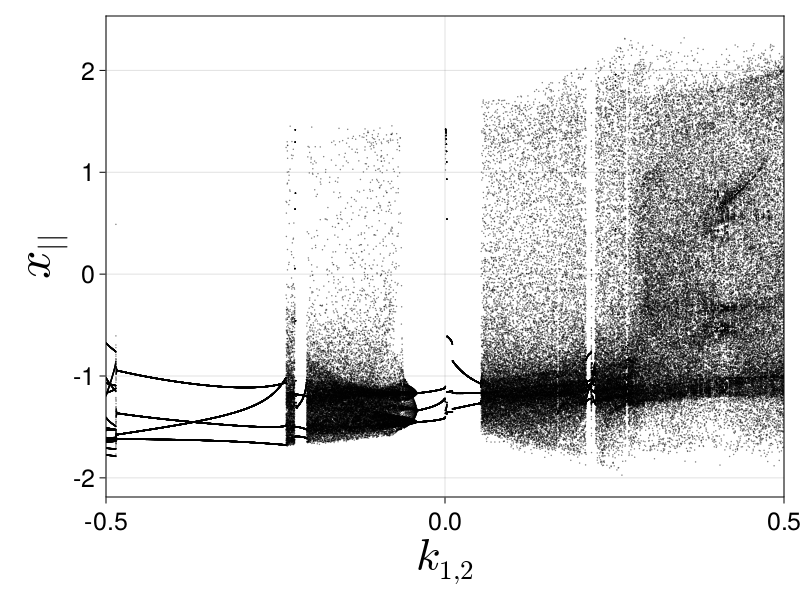

In [186]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
    xlabelsize = 45, ylabelsize = 50, xticklabelsize = 25, yticklabelsize = 25  )

xlims!(ax, -0.5, 0.5)

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 0.5), markersize = 1.5
    )
    
end
fig

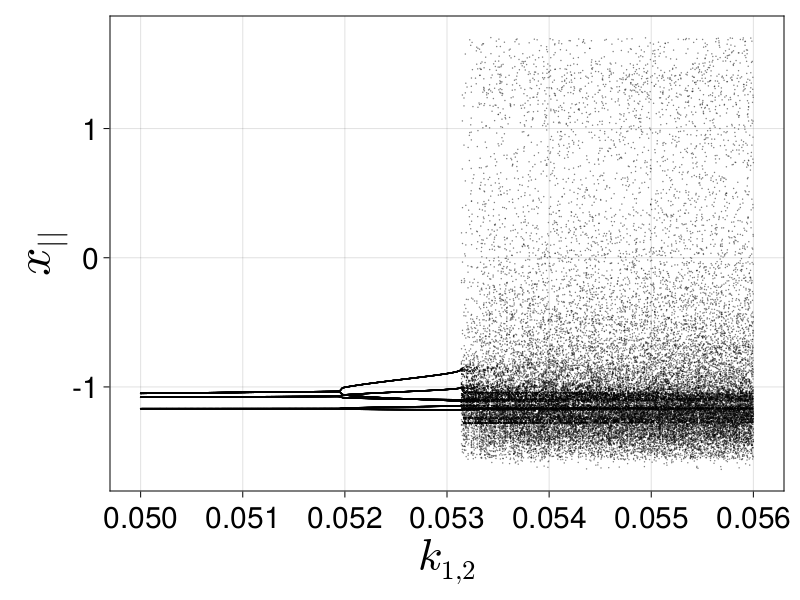

In [171]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
    xlabelsize = 45, ylabelsize = 50, xticklabelsize = 30, yticklabelsize = 30  )

#xlims!(ax, 0.052, 0.0523)

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 0.5), markersize = 1.5
    )
    
end
fig

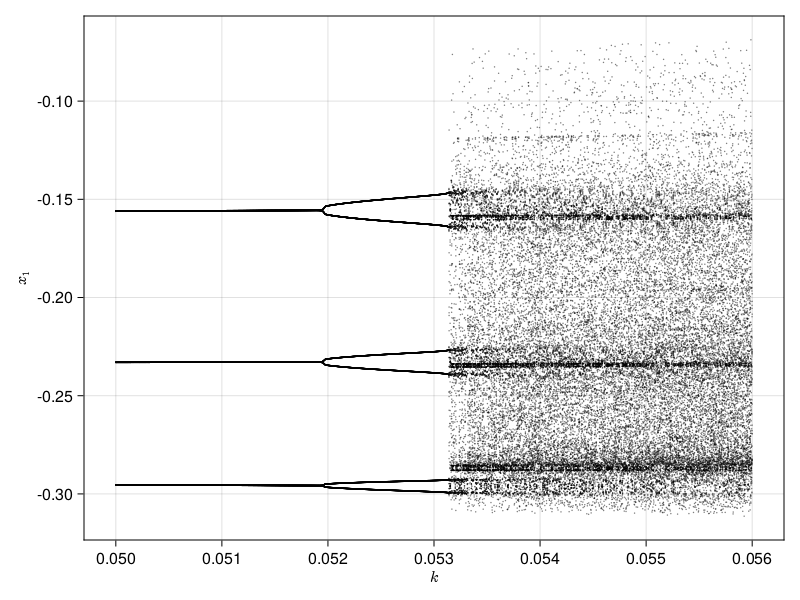

In [25]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{1}")


for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
    
end
fig

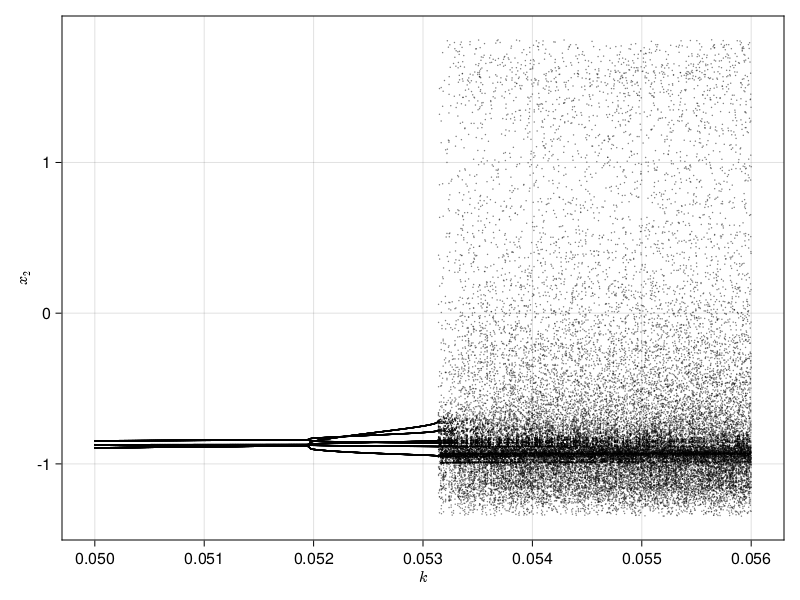

In [26]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{2}")


for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 0.5), markersize = 1.5
    )
    
end
fig

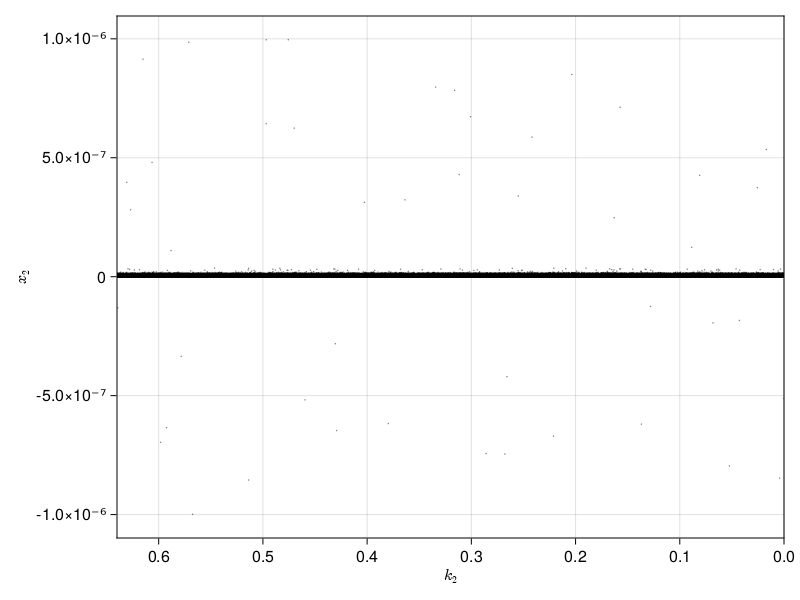

In [47]:
# from regular 
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.64, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

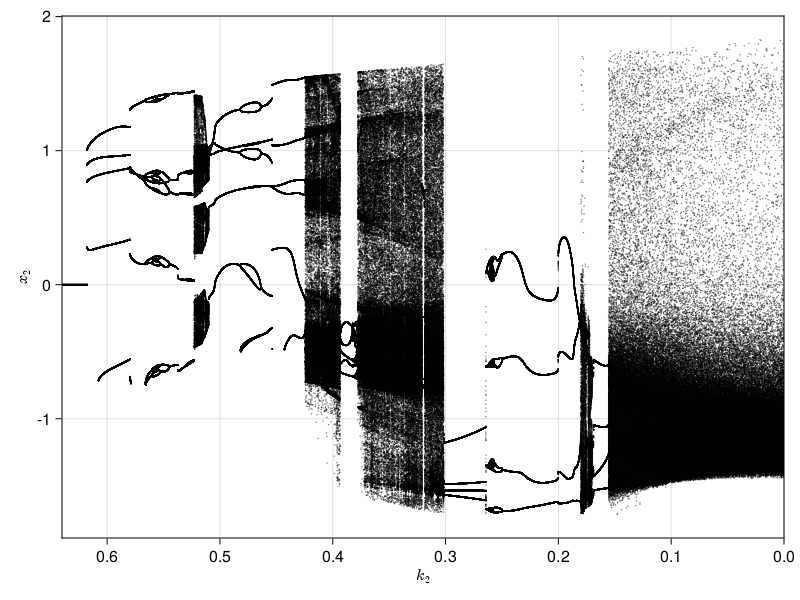

In [44]:
# from chaos 
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.64, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

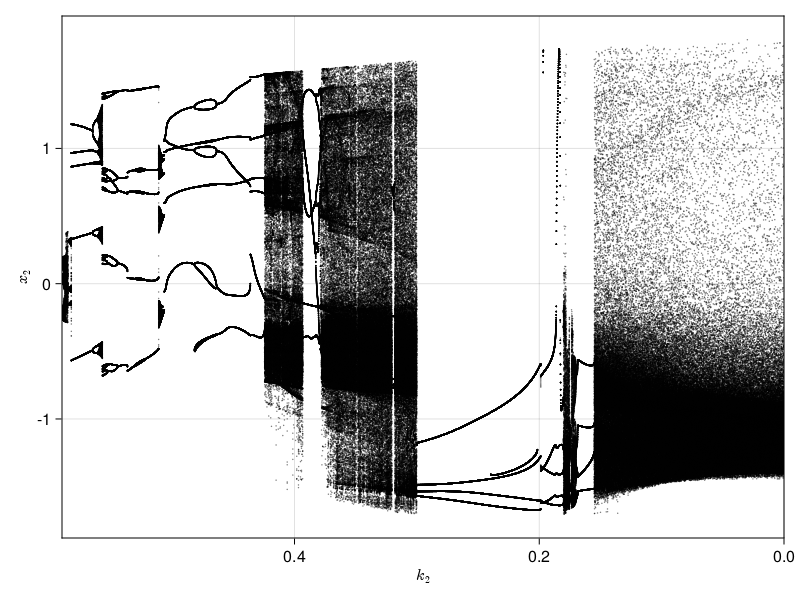

In [24]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.59, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

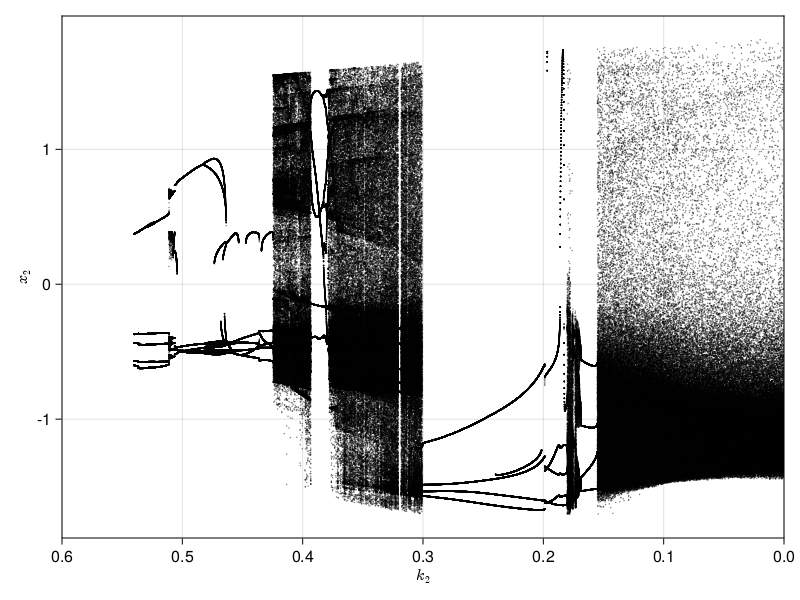

In [21]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.6, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

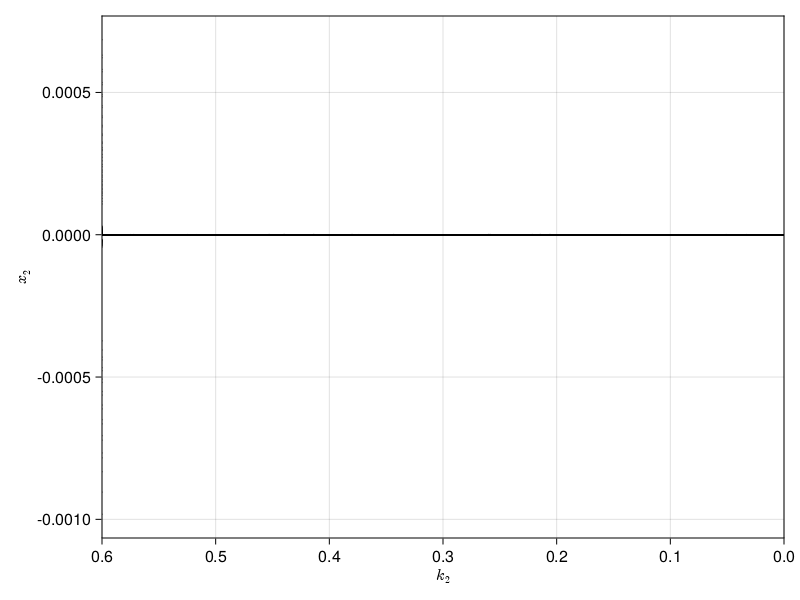

In [18]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.6, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

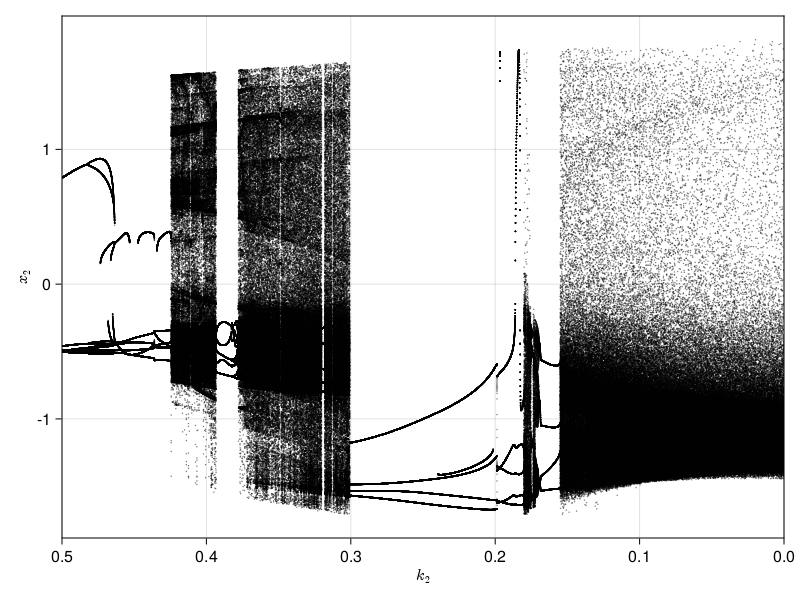

In [14]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.5, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

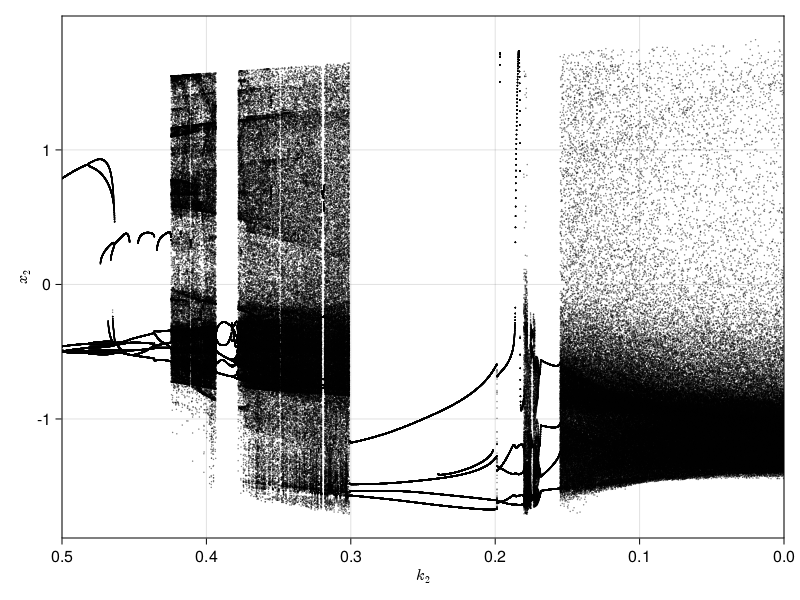

In [10]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.5, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

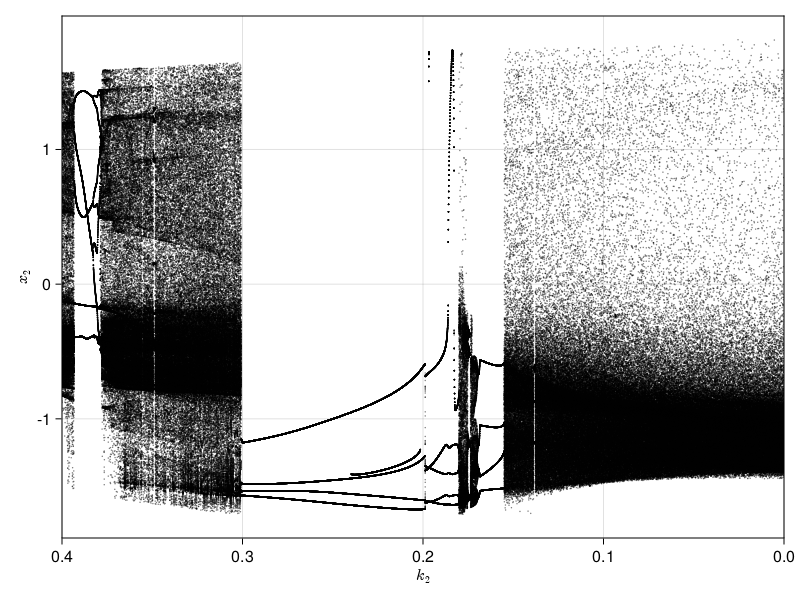

In [7]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

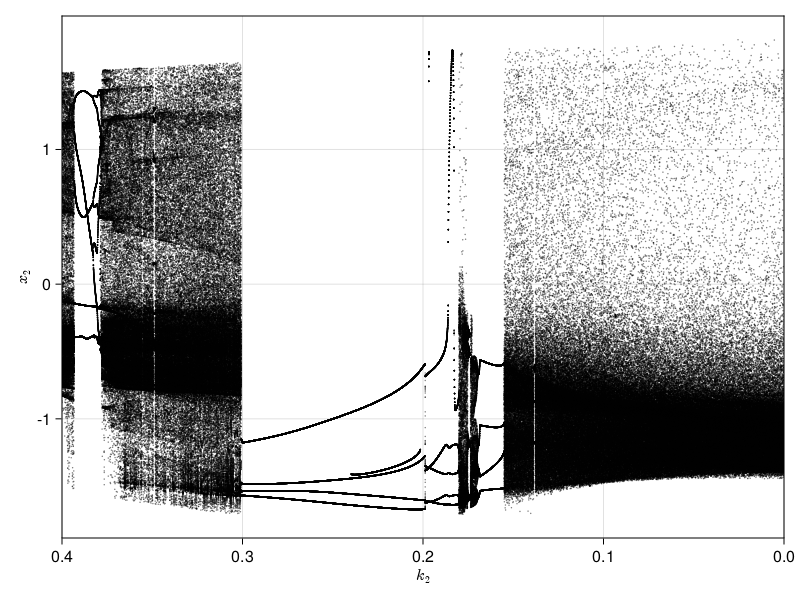

In [72]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

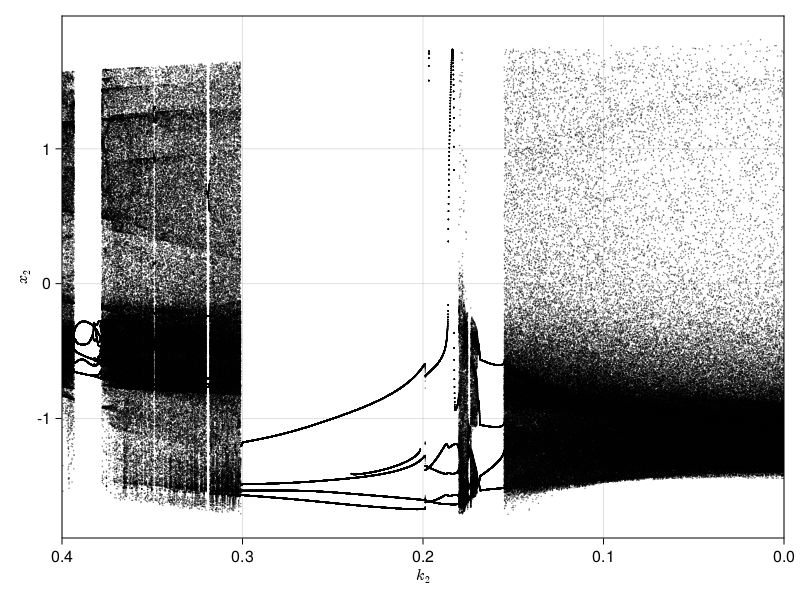

In [66]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

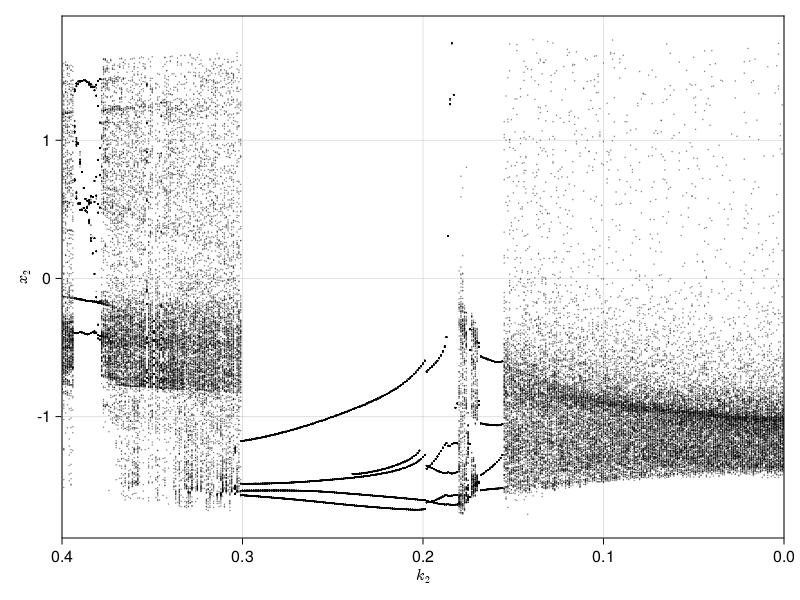

In [36]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

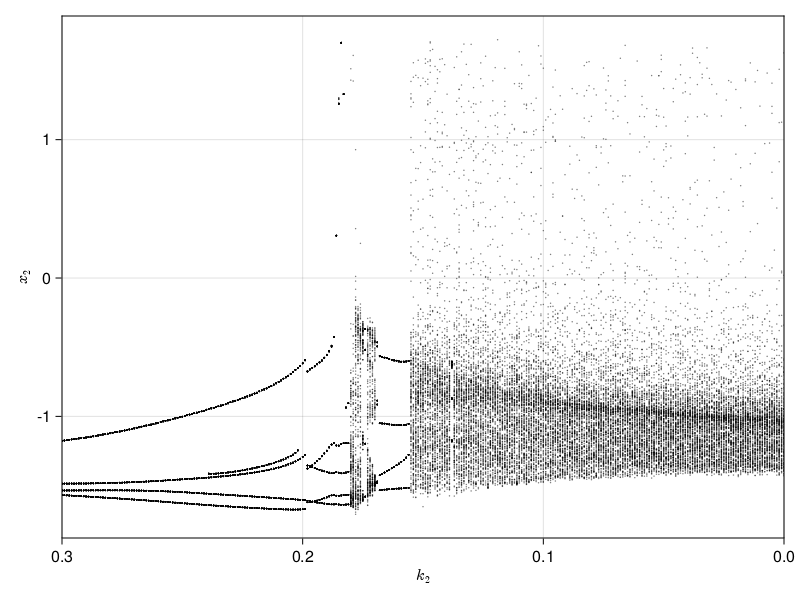

In [33]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.3, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

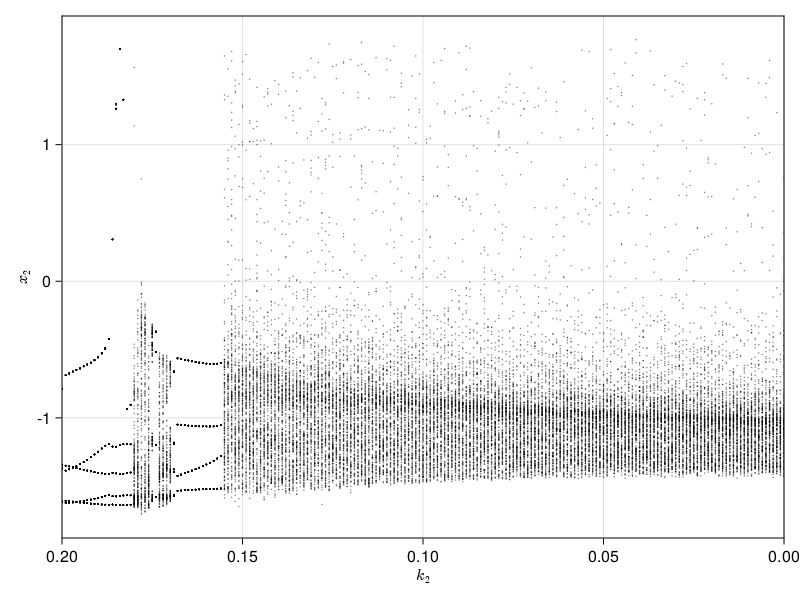

In [30]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.2, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

In [22]:
pvalues = range(0.6, stop = 0, length = 500)
i = 4
plane = (1, 0.0)
tf = 50000.0
p_index = 12

12

12

## с хаотической траектории

In [23]:
output = produce_orbitdiagram(ds_HR1, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 25000.0, u0 = condition1;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

In [ ]:
fig = Figure(resolution = (1600, 600), fontsize = 20)
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 0.6, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.8
    )
end
fig

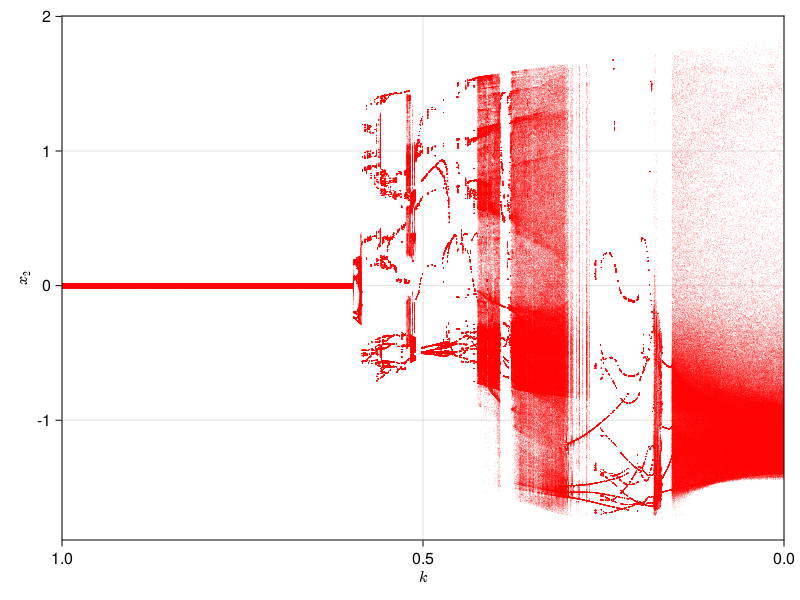

In [22]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("red", 0.5), markersize = 0.6
    )
end
fig

## с квазипериодической траектории

In [23]:
output1 = produce_orbitdiagram(ds_HR2, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0, u0 = condition2;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

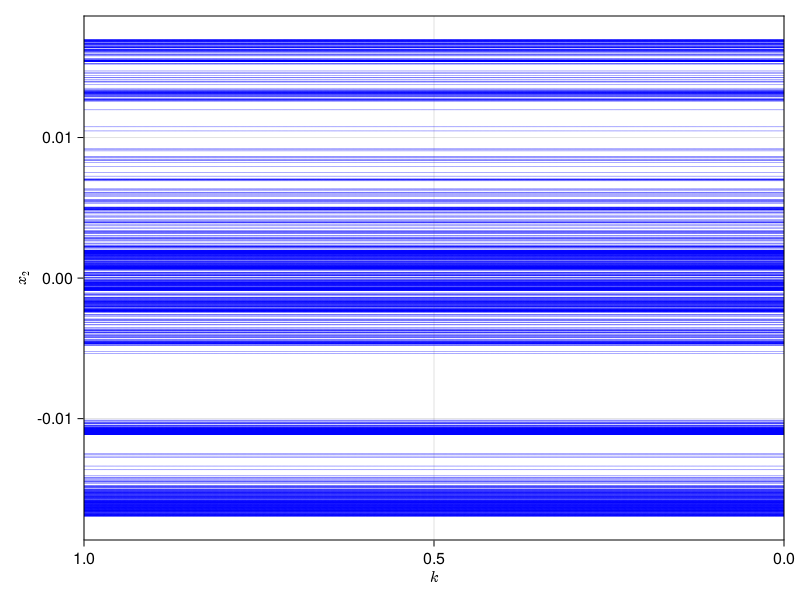

In [24]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("blue", 0.5), markersize = 0.6
    )
end
fig

## с обеих

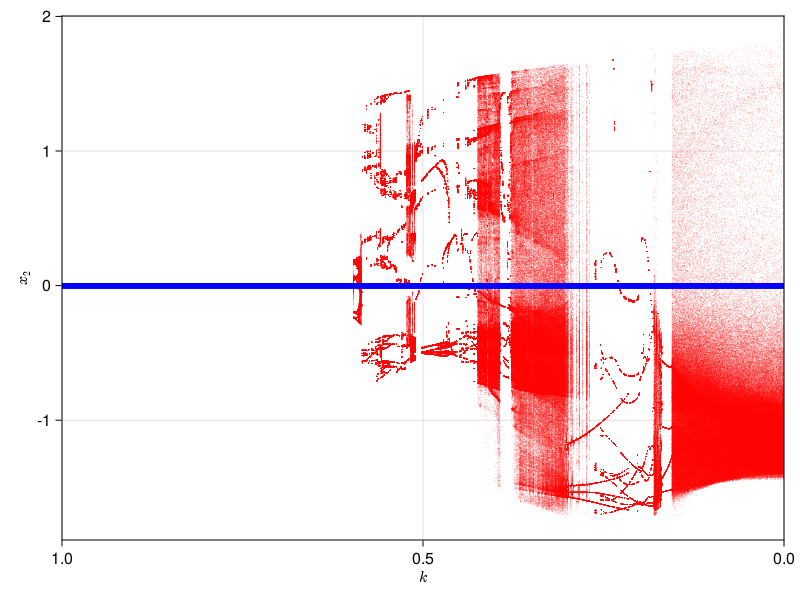

In [25]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)

for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("red", 0.5), markersize = 0.6
    )
end

for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("blue", 0.5), markersize = 0.6
    )
end

fig

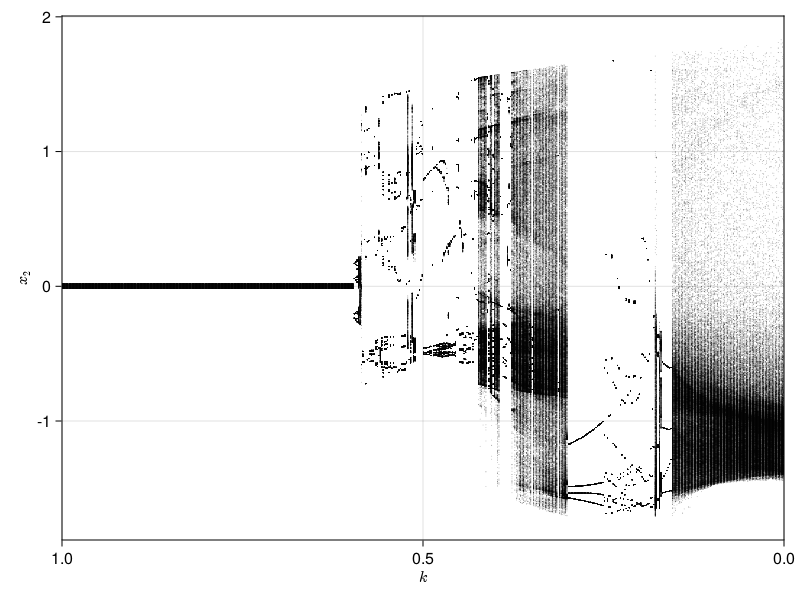

In [11]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

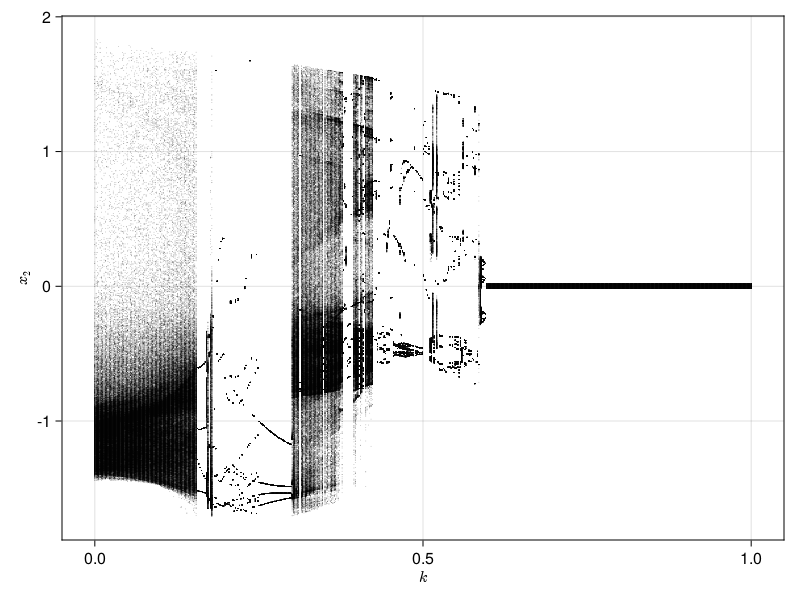

In [12]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

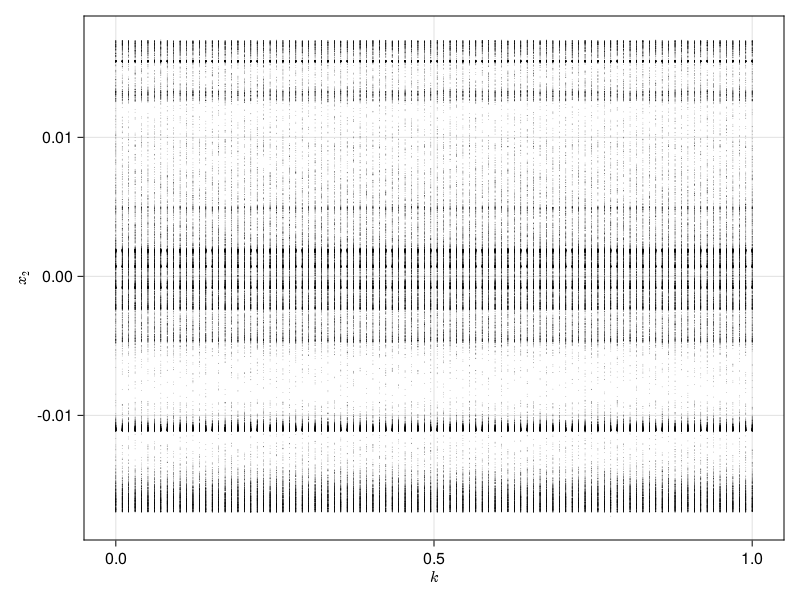

In [8]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

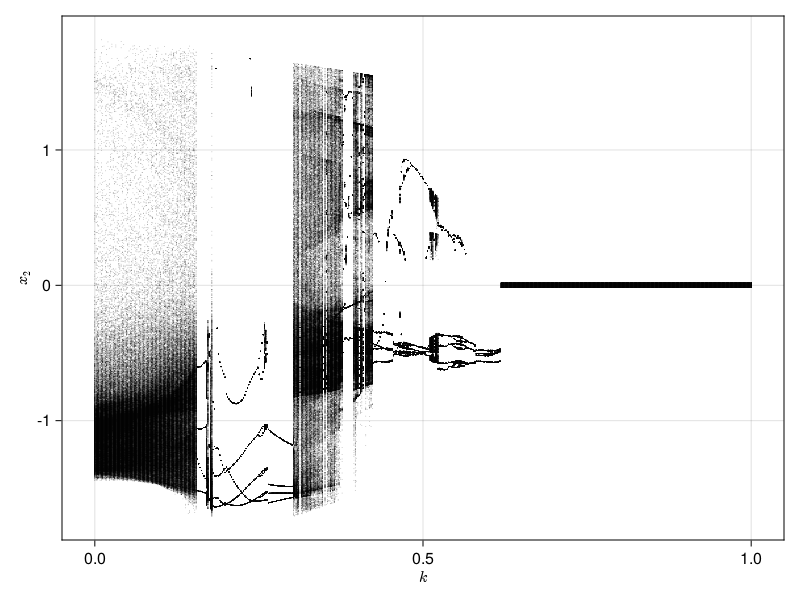

In [14]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

## y1 = 0, plot k in x1

In [16]:
pvalues = range(0, stop = 1, length = 500)
i = 1

plane = (2, 0.0)
tf = 100000.0
p_index = 12

12

In [17]:
output = produce_orbitdiagram(ds_HR, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

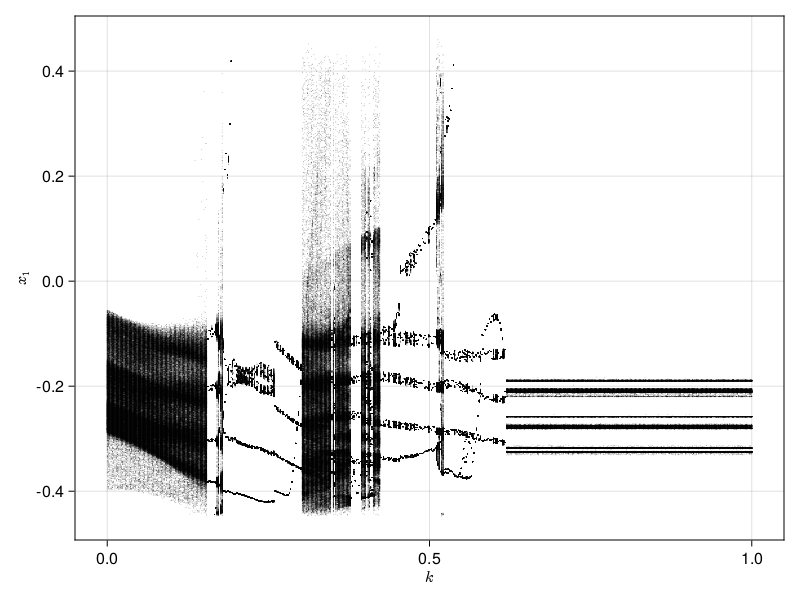

In [19]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_1")
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig